In [1]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint # better than dumps

import openweathermapy.core as owm

from config import weather_api_key
from config import NYT_api_key
from config import gkey
from config import cen_api_key

# Access maps with unique API key
import gmaps
gmaps.configure(api_key=gkey)

from census import Census
# Census API Key
c = Census(cen_api_key, year=2013)

In [2]:
# URL for GET requests to retrieve vehicle data
url = "https://api.spacexdata.com/v2/launchpads"

In [3]:
# Retrieving data and converting it into JSON
print(requests.get(url).json())

[{'padid': 1, 'id': 'kwajalein_atoll', 'full_name': 'Kwajalein Atoll Omelek Island', 'status': 'retired', 'location': {'name': 'Omelek Island', 'region': 'Marshall Islands', 'latitude': 9.0477206, 'longitude': 167.7431292}, 'vehicles_launched': ['Falcon 1'], 'attempted_launches': 5, 'successful_launches': 2, 'wikipedia': 'https://en.wikipedia.org/wiki/Omelek_Island', 'details': 'SpaceX original launch site, where all of the Falcon 1 launches occured. Abandoned as SpaceX decided against upgrading the pad to support Falcon 9.'}, {'padid': 2, 'id': 'ccafs_slc_40', 'full_name': 'Cape Canaveral Air Force Station Space Launch Complex 40', 'status': 'active', 'location': {'name': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366}, 'vehicles_launched': ['Falcon 9'], 'attempted_launches': 41, 'successful_launches': 39, 'wikipedia': 'https://en.wikipedia.org/wiki/Cape_Canaveral_Air_Force_Station_Space_Launch_Complex_40', 'details': 'SpaceX primary Falcon 9 la

In [4]:
# print(json.dumps(response[0], indent=4, sort_keys=True))

In [5]:
# Pretty Print the output of the JSON
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

[
    {
        "attempted_launches": 5,
        "details": "SpaceX original launch site, where all of the Falcon 1 launches occured. Abandoned as SpaceX decided against upgrading the pad to support Falcon 9.",
        "full_name": "Kwajalein Atoll Omelek Island",
        "id": "kwajalein_atoll",
        "location": {
            "latitude": 9.0477206,
            "longitude": 167.7431292,
            "name": "Omelek Island",
            "region": "Marshall Islands"
        },
        "padid": 1,
        "status": "retired",
        "successful_launches": 2,
        "vehicles_launched": [
            "Falcon 1"
        ],
        "wikipedia": "https://en.wikipedia.org/wiki/Omelek_Island"
    },
    {
        "attempted_launches": 41,
        "details": "SpaceX primary Falcon 9 launch pad, where all east coast Falcon 9s launched prior to the AMOS-6 anomaly. Initially used to launch Titan rockets for Lockheed Martin. Back online since CRS-13 on 2017-12-15.",
        "full_name": "Cape Ca

In [6]:
# Performing a GET Request and saving the 
# API's response within a variable
url3 = "https://api.spacexdata.com/v2/rockets/falcon9"
response = requests.get(url3)
response_json = response.json()

# It is possible to grab a specific value 
print(response_json["cost_per_launch"])

# values stored within sub-dictionaries and sub-lists
payload_weight = response_json["payload_weights"][0]["kg"]
print ("The first payload weight is: "+ str(payload_weight))

50000000
The first payload weight is: 22800


In [7]:
# PPRINT
url = "http://www.omdbapi.com/?t="
api_key = "&apikey=trilogy"
movie = input ("Select a Movie: ")
response = requests.get(url + movie + api_key)
print(response.url)
data = response.json()
pprint(data)
print(f"Movie was directed by {data['Director']}.")
print(f"Movie was released in {data['Country']}.")
print (data["Plot"])

Select a Movie: Jaws
http://www.omdbapi.com/?t=Jaws&apikey=trilogy
{'Actors': 'Roy Scheider, Robert Shaw, Richard Dreyfuss, Lorraine Gary',
 'Awards': 'Won 3 Oscars. Another 11 wins & 18 nominations.',
 'BoxOffice': 'N/A',
 'Country': 'USA',
 'DVD': '11 Jul 2000',
 'Director': 'Steven Spielberg',
 'Genre': 'Adventure, Drama, Thriller',
 'Language': 'English',
 'Metascore': '87',
 'Plot': "When a killer shark unleashes chaos on a beach resort, it's up to a "
         'local sheriff, a marine biologist, and an old seafarer to hunt the '
         'beast down.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMmVmODY1MzEtYTMwZC00MzNhLWFkNDMtZjAwM2EwODUxZTA5XkEyXkFqcGdeQXVyNTAyODkwOQ@@._V1_SX300.jpg',
 'Production': 'Universal Pictures',
 'Rated': 'PG',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.0/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '97%'},
             {'Source': 'Metacritic', 'Value': '87/100'}],
 'Released': '20 Jun 1975',
 'Response': 'True'

In [8]:
url5 = "http://jsonplaceholder.typicode.com/posts/"
response_json = []
indices = [97, 71, 83, 56, 2, 53, 67, 79, 35, 55]
# Make a request for each of the indices
for x in range(len(indices)):
    print(f"Making request number: {x} for ID: {indices[x]}")

    # Get one of the posts
    post_response = requests.get(url + str(indices[x]))

    # Save post's JSON
    response_json.append(post_response.json())
print(response_json)

Making request number: 0 for ID: 97
Making request number: 1 for ID: 71
Making request number: 2 for ID: 83
Making request number: 3 for ID: 56
Making request number: 4 for ID: 2
Making request number: 5 for ID: 53
Making request number: 6 for ID: 67
Making request number: 7 for ID: 79
Making request number: 8 for ID: 35
Making request number: 9 for ID: 55
[{'Response': 'False', 'Error': 'No API key provided.'}, {'Response': 'False', 'Error': 'No API key provided.'}, {'Response': 'False', 'Error': 'No API key provided.'}, {'Response': 'False', 'Error': 'No API key provided.'}, {'Response': 'False', 'Error': 'No API key provided.'}, {'Response': 'False', 'Error': 'No API key provided.'}, {'Response': 'False', 'Error': 'No API key provided.'}, {'Response': 'False', 'Error': 'No API key provided.'}, {'Response': 'False', 'Error': 'No API key provided.'}, {'Response': 'False', 'Error': 'No API key provided.'}]


In [9]:
url6 = "http://www.omdbapi.com/?apikey=trilogy&t="

movies = ["Aliens", "Sing", "Moana"]
response_json6 = []
for x in range(len(movies)):
    post_response = requests.get(url6 + str(movies[x]))
    direct = post_response.json()["Director"]
    response_json6.append(direct)
    print ("The director of " + str(movies[x]) + " is " + direct)
print (response_json6)

The director of Aliens is James Cameron
The director of Sing is Garth Jennings, Christophe Lourdelet(co-director)
The director of Moana is Ron Clements, John Musker, Don Hall(co-director), Chris Williams(co-director)
['James Cameron', 'Garth Jennings, Christophe Lourdelet(co-director)', 'Ron Clements, John Musker, Don Hall(co-director), Chris Williams(co-director)']


In [10]:
# NY TIMES

url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"
# Store a search term
query = "crime"
# Search for articles published between a begin and end date
begin_date = 20140101
end_date = 20141231
# Build url
query_url = url + "api-key=" + NYT_api_key + "&q=" + query + "&begin_date=" + str(begin_date) + "&end_date=" + str(end_date)
# Retrieve articles
articles = requests.get(query_url).json()
articles_list = [article for article in articles["response"]["docs"]]
print("Your Reading List")
for article in articles_list:
    print(article["snippet"])
    print(article["web_url"])

Your Reading List
Roundups of crime novels by Marilyn Stasio in The New York Times Book Review.
https://www.nytimes.com/column/crime
A weekly column exploring crime in the New York City and the characters on both sides of the law.
https://www.nytimes.com/column/crime-scene
An outré reading list for the holiday season.
https://www.nytimes.com/2014/12/07/books/review/frances-larsons-severed-and-more.html
In Cornwell’s new thriller, Kay Scarpetta’s expertise is needed with a murder victim, a man once accused of being a terrorist.
https://www.nytimes.com/2014/11/16/books/review/patricia-cornwells-flesh-and-blood-and-more.html
Anthony Horowitz’s “Moriarty” is a Sherlock ­Holmes pastiche that opens five days after the great detective and his nemesis plunged to their doom.
https://www.nytimes.com/2014/12/21/books/review/anthony-horowitzs-moriarty-and-more.html
How racial bias distorts the way we talk about justice.
https://www.nytimes.com/2014/12/01/opinion/charles-blow-crime-and-punishment.h

In [11]:
# First entry =  [0]
# Last entry = [-1]


In [12]:
# ADD WEATHER 
from config import weather_api_key
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
unit = "metric"
# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
temp = weather_json["main"]["temp"]
print(f"The current temperture in {city} is : {temp} Celsius.")

The current temperture in London is : 8.69 Celsius.


In [13]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
cities = ["Paris", "London", "Oslo", "Beijing"]
# set up lists to hold reponse info
lat = []
temp = []
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])
print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.86, 51.51, 59.91, 39.91]
The temperature information received is: [7.98, 8.69, 2.68, 12.67]


      city    lat   temp
0    Paris  48.86   7.98
1   London  51.51   8.69
2     Oslo  59.91   2.68
3  Beijing  39.91  12.67


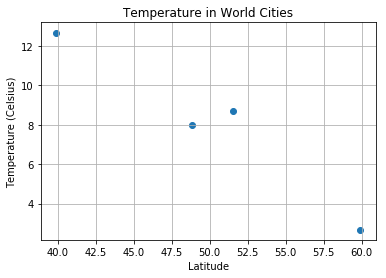

In [14]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
print(weather_data.head())
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

In [15]:
# ERROR HANDLING/ EXCEPTIONS
students = {
    "James": 27,
    "Sarah": 19,
    "Jocelyn": 28}
# Try to access key that doesn't exist
try:
    students["Jezebel"]
except KeyError: #should put the right error in
    print("Oops, that key doesn't exist.")
# "Catching" the error lets the rest of our code execute
print("...But the program doesn't die early!")

Oops, that key doesn't exist.
...But the program doesn't die early!


In [16]:
# Open Weather
#config
from config import weather_api_key
# Create settings dictionary with information we're interested in
settings = {"units": "metric", "appid": weather_api_key} # can include q=
# Get current weather
current_weather_paris = owm.get_current("Paris", **settings)
print(f"Current weather object for Paris: {current_weather_paris}.")
print("***************************")
summary = ["name", "main.temp"]
data = current_weather_paris(*summary)
print(f"The current weather summary for Paris is: {data}.")

Current weather object for Paris: {'coord': {'lon': 2.35, 'lat': 48.86}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 7.98, 'pressure': 1022, 'humidity': 57, 'temp_min': 6.11, 'temp_max': 10}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 270}, 'clouds': {'all': 76}, 'dt': 1552931185, 'sys': {'type': 1, 'id': 6540, 'message': 0.0134, 'country': 'FR', 'sunrise': 1552888717, 'sunset': 1552931938}, 'id': 2988507, 'name': 'Paris', 'cod': 200}.
***************************
The current weather summary for Paris is: ('Paris', 7.98).


In [17]:
#WORLD BANK
url = "http://api.worldbank.org/v2/"
format = "json"
# Get country information in JSON format
countries_response = requests.get(f"{url}countries?format={format}").json()
# First element is general information, second is countries themselves
countries = countries_response[1]
# Report the names
for country in countries:
    print(country["name"])

Aruba
Afghanistan
Africa
Angola
Albania
Andorra
Andean Region
Arab World
United Arab Emirates
Argentina
Armenia
American Samoa
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
East Asia & Pacific (IBRD-only countries)
Europe & Central Asia (IBRD-only countries)
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
IBRD countries classified as high income
Bahrain
Bahamas, The
Bosnia and Herzegovina
Latin America & the Caribbean (IBRD-only countries)
Belarus
Belize
Middle East & North Africa (IBRD-only countries)
Bermuda
Bolivia
Brazil
Barbados
Brunei Darussalam
Sub-Saharan Africa (IBRD-only countries)
Bhutan
Botswana
Sub-Saharan Africa (IFC classification)
Central African Republic
Canada
East Asia and the Pacific (IFC classification)
Central Europe and the Baltics
Europe and Central Asia (IFC classification)
Switzerland
Channel Islands
Chile
China


## GOOGLE

In [24]:
# GOOGLE GEOCODE
# Target city
target_city = "Boise, Idaho"

# # Build the endpoint URL
# target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
#     'address={0}&key={1}').format(target_city, gkey)

# geo_data = requests.get(target_url).json()

params = {"address": target_city, "key": gkey}
# Build URL using the Google Maps API
base_url = "https://maps.googleapis.com/maps/api/geocode/json"
# Run request
response = requests.get(base_url, params=params)
# Convert to JSON
geo_data = response.json()

# Print the json (pretty printed)
# print(json.dumps(geo_data, indent=4, sort_keys=True))

# Extract latitude and longitude
lat = geo_data["results"][0]["geometry"]["location"]["lat"]
lng = geo_data["results"][0]["geometry"]["location"]["lng"]

# Print the latitude and longitude
print('''
    City: {0}
    Latitude: {1}
    Longitude: {2}
    '''.format(target_city, lat, lng))


    City: Boise, Idaho
    Latitude: 43.6150186
    Longitude: -116.2023137
    


In [22]:
# GOOGLE PLACES

# geocoordinates
target_coordinates = "43.6187102, -116.2146068"
target_search = "Chinese"
target_radius = 8000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()

# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

# Print the name and address of the first restaurant that appears
print(places_data["results"][0]["name"])
print(places_data["results"][0]["vicinity"])

Yen Ching Restaurant
305 N 9th St, Boise


In [26]:
#CALL FROM CSV AND STORE AS DATAFRAME

#Read in csv file
types_df = pd.read_csv("Resources/ethnic.csv")
# set up additional columns to hold information
types_df['name'] = ""
types_df['address'] = ""
types_df['price_level'] = ""
types_df['rating'] = ""

# find the closest restaurant of each type to coordinates

base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
params = {
    "location": "39.952583,-75.16522",  # philadelphia coords,
    "rankby": "distance",
    "type": "restaurant",
    "key": gkey,
}

# use iterrows to iterate through pandas dataframe
for index, row in types_df.iterrows():
    # get restaurant type from df
    restr_type = row['ethnicity']
    # add keyword to params dict
    params['keyword'] = restr_type
    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {restr_type}.")
    response = requests.get(base_url, params=params).json()
    # extract results
    results = response['results']
    
    try:
        print(f"Closest {restr_type} restaurant is {results[0]['name']}.")
        
        types_df.loc[index, 'name'] = results[0]['name']
        types_df.loc[index, 'address'] = results[0]['vicinity']
        types_df.loc[index, 'price_level'] = results[0]['price_level']
        types_df.loc[index, 'rating'] = results[0]['rating']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")
print (types_df)

Retrieving Results for Index 0: chinese.
Closest chinese restaurant is Chinese Fast Wok.
------------
Retrieving Results for Index 1: cuban.
Closest cuban restaurant is Alma de Cuba.
------------
Retrieving Results for Index 2: czech.
Missing field/result... skipping.
------------
Retrieving Results for Index 3: french.
Closest french restaurant is Caribou Cafe.
------------
  ethnicity              name                                 address  \
0   chinese  Chinese Fast Wok  1500 John F Kennedy Blvd, Philadelphia   
1     cuban      Alma de Cuba            1623 Walnut St, Philadelphia   
2     czech                                                             
3    french      Caribou Cafe            1126 Walnut St, Philadelphia   

  price_level rating  
0           2      2  
1           3    4.4  
2                     
3           2    4.2  


In [2]:
# CREATE A MAP with MARKERS

# Create a list containing coordinates
coordinates = [
    (40.71, -74.00),
    (30.26, -97.74),
    (46.87, -96.78),
    (47.60, -122.33),
    (32.71, -117.16)
]
# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
# Assign the marker layer to a variable
# markers = gmaps.marker_layer(locations, info_box_content=[f"Poverty Rate: {rate}" for rate in poverty_rate])
markers = gmaps.marker_layer(coordinates)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [6]:
# CREATE A MAP WITH HEATMAP

# Create a list containing coordinates
coordinates = [
    (40.71, -74.00),
    (30.26, -97.74),
    (46.87, -96.78),
    (47.60, -122.33),
    (32.71, -117.16)
]

rating = [5,4,2.5,4,3]

# locations = merge_db[["Latitude", "Longitude"]] - when pulling from a databse
# poverty_rate = merge_db["Poverty Rate"].tolist()

# Plot Heatmap
fig = gmaps.figure() # (map_type="HYBRID") or TERRAIN
# Create heat layer
heat_layer = gmaps.heatmap_layer(coordinates, weights=rating, dissipating=False, max_intensity=5, point_radius=1)
# Add layer
fig.add_layer(heat_layer)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [3]:
# CENSUS DATA
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels

census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate"]]

# Visualize
print(len(census_pd))
census_pd.head()
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
# census_pd.to_csv("census_data.csv", encoding="utf-8", index=False)

33120


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,08518,5217.0,41.5,74286.0,33963.0,170.0,3.258578
1,08520,27468.0,37.4,90293.0,37175.0,1834.0,6.676860
2,08525,4782.0,47.1,118656.0,59848.0,43.0,0.899205
3,08527,54867.0,42.2,88588.0,37021.0,2191.0,3.993293
4,08528,245.0,48.5,58676.0,49117.0,0.0,0.000000


In [ ]:
# GIT COMMANDS
# Create your own branch
#    git checkout -b"nameofbranch"
# Then make sure to do a add, commit and then a push below 
#    git push origin nameofbranch 
# git checkout master


#To look at another branch
#    git fetch
# To see someone elses
#    git checkout nameofbranch
